# Example Notebook

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
os.chdir('../')

In [3]:
from portfolio import Portfolio
import estimation as est
import optimization as opt

## 1. Loading Data and Setup
- We first load the data using the `Portfolio` class and it's associated method `get_prices`. The analysis is restricted by a period required to be set by `set_period`. 

In [4]:
securities_big = ['SPY', 'BND', 'GLD', 'NDX']
pf1 = Portfolio(securities_big)
pf1.set_period(('2018-01-01', '2021-05-28'))
pf1.get_prices('daily')

[*********************100%***********************]  4 of 4 completed


- Then we set the constraints using `set_constraints` and conduct a historical backtest. This will store backtest results in the `Portfolio` class based on the frequency of the rebalance (in trading days), it's estimation period (in trading days) and the model selected in the `models: list`.

In [5]:
pf1.set_constraints(None, True)
pf1.historical_backtest(models=['EW', 'GMV', 'RP'], frequency=22, estimation_period = 252)

In [6]:
df1 = pd.DataFrame.from_dict(pf1.backtest)
dfrets = df1.loc['returns']

In [7]:
df1rets = pd.DataFrame({'EW': pf1.backtest['EW']['returns'].flatten(),
                        'GMV': pf1.backtest['GMV']['returns'].flatten()},
                        index = pf1.dates[252:].strftime('%Y-%m-%d'))

In [138]:
df1rets = pd.DataFrame({'EW': pf1.backtest['EW']['returns'].flatten(),
                        'GMV': pf1.backtest['GMV']['returns'].flatten(),
                        'RP': pf1.backtest['RP']['returns'].flatten()},
                       index = pf1.dates[252:].strftime('%Y-%m-%d'))

In [139]:
df1retscum = (1+df1rets).cumprod()

<AxesSubplot:xlabel='Date'>

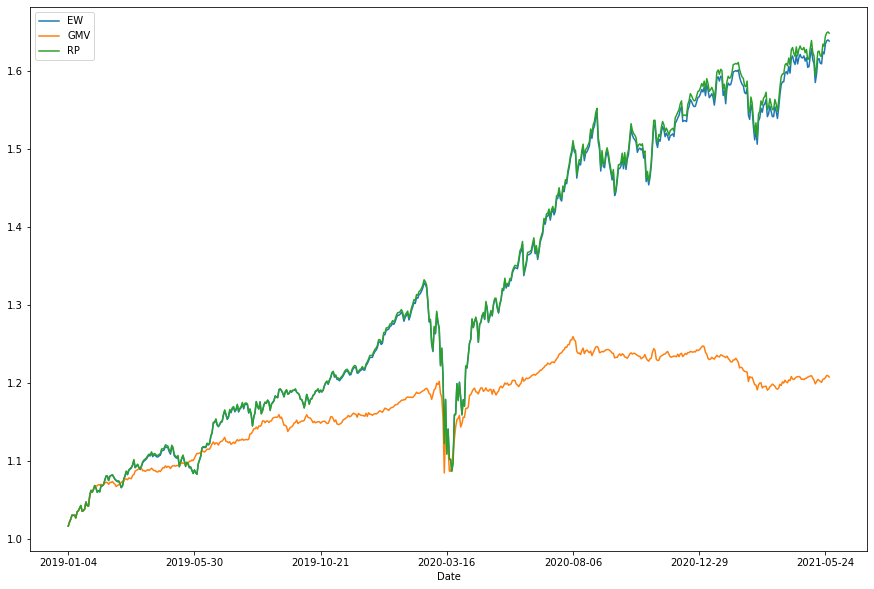

In [140]:
df1retscum.plot(figsize = (15,10))

In [18]:
df1weights = pd.DataFrame({'EW': pf1.backtest['EW']['weights'],
                        'GMV': pf1.backtest['GMV']['weights'],
                        'RP': pf1.backtest['RP']['weights']})

In [121]:
testweight = pd.DataFrame(np.concatenate(pf1.backtest['GMV']['weights'],axis=1).T, columns = pf1.securities)

In [122]:
np.vstack(testweight.values.T).shape

(4, 28)

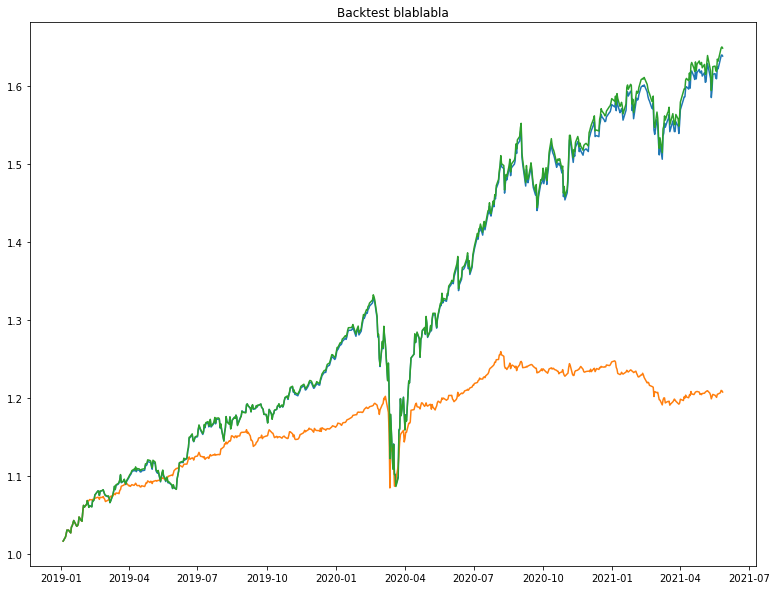

In [141]:
ax = plt.gca()
fig = plt.gcf()
fig.set_figheight(10)
fig.set_figwidth(13)
ax.set_title('Backtest blablabla')
labels = ['EW', 'GMV', 'RP']
ax.plot(pf1.dates[252:],df1retscum)

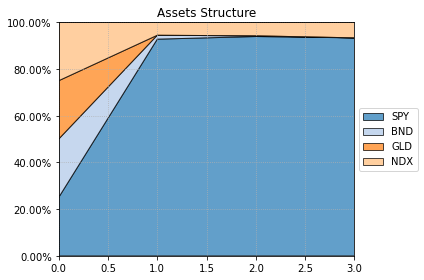

In [125]:
#todo implement this into plotting

ax = plt.gca()
fig = plt.gcf()

ax.set_title("Assets Structure")
labels = testweight.columns.tolist()

colormap = cm.get_cmap('tab20')
colormap = colormap(np.linspace(0, 1, 20))

cycle = plt.cycler("color", colormap)
ax.set_prop_cycle(cycle)

X = testweight.index.tolist()

ax.stackplot(X, np.vstack(testweight.values.T), labels=labels, alpha=0.7, edgecolor="black")

ax.set_ylim(0, 1)
ax.set_xlim(0, len(labels) - 1)

ticks_loc = ax.get_yticks().tolist()
ax.set_yticks(ax.get_yticks().tolist())
ax.set_yticklabels(["{:3.2%}".format(x) for x in ticks_loc])
ax.grid(linestyle=":")

n = int(np.ceil(len(labels) / 4))

ax.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5), ncol=n)

fig = plt.gcf()
fig.tight_layout()